In [1]:
import pickle
from sklearn import linear_model
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as pca

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import math
import pickle

working_dir = '/Users/tyler/Desktop/dissertation/programming/tcav_on_azure'


In [2]:
## define functions
def vector_norm(vec):
    norm_const = math.sqrt(vec[0]*vec[0] + vec[1]*vec[1])
    return vec / norm_const

def vec_norm(vec):
    return  vec / np.linalg.norm(vec)

## CAV distance
def euclidean_distance(a,b):
    return np.linalg.norm(a-b)

## Load CAV and training/testing data

In [3]:
class_1 = 'striped_sub_1'
#class_1 = 'striped_sub_2'
#class_1 = 'random500_0'

class_2 = 'random500_0'
#class_2 = 'random500_1'
#class_2 = 'noise_color'
#class_2 = 'horse_sub_2'

layer = 'mixed9'
lm_type = 'linear'
#lm_type = 'logistic'
cav_name = class_1 + '-' + class_2 + '-' + layer + '-' + lm_type + '-0.1'
sub_path = 'cav_dir/' + cav_name 

# Load training/testing data
path = os.path.join(working_dir,sub_path + '_test.pkl')
with open(path, 'rb') as f:
    data = pickle.load(f)
    
d = dict(data)
x_train = d['x_train']
x_test = d['x_test']
y_train = d['y_train']
y_test = d['y_test']
y_pred = d['y_pred']

path = os.path.join(working_dir,sub_path + '.pkl')

with open(path, 'rb') as f:
    cav_data = pickle.load(f)
this_cav = cav_data['cavs'][0]

In [4]:
#x_train.shape

In [5]:
## PCA
#pca_instance = pca(n_components=2).fit(x_train)
#pca_components = pca_instance.components_
#pickle.dump(pca_components, open('pca/pca_components_mixed9.pkl','wb'))

pca_components = pickle.load(open('pca/pca_components_mixed9.pkl', 'rb'))

In [6]:
# TRAIN
x_train_embed_pca = np.dot(pca_components, x_train.T)

x1_train_pca = x_train_embed_pca[0]
x2_train_pca = x_train_embed_pca[1]

color_train_pca = ['red' if y == 0 else 'blue' for y in y_train]

# TEST
x_test_embed_pca = np.dot(pca_components, x_test.T)

x1_test_pca = x_test_embed_pca[0]
x2_test_pca = x_test_embed_pca[1]

light_blue = '#b3b8fb'
light_red = '#f6889f'

color_test_pca = [light_red if y == 0 else light_blue for y in y_test]


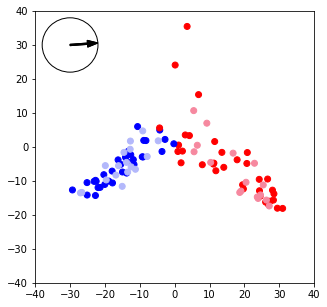

In [7]:
fig = plt.figure(figsize=[5,5])

plt.scatter(x1_train_pca, x2_train_pca, color = color_train_pca)
plt.scatter(x1_test_pca, x2_test_pca, color = color_test_pca) #, alpha = .6)

circ = plt.Circle((-30, 30), radius=8, edgecolor='black', facecolor='None')
ax = plt.gca()

ax.add_patch(circ)

cav_pca = np.dot(pca_components, this_cav.T)
cav_norm = vector_norm(cav_pca)
cav_norm *= 8
#origin = [-30],[30]
#plt.quiver(*origin, cav_norm[0], cav_norm[1], color='black',scale=100)

arrow_start = [-30,30]

my_arrow = plt.arrow(arrow_start[0], arrow_start[1], cav_norm[0], cav_norm[1],width=.4,
                     length_includes_head=True,head_width=2,fc='k', ec=None)
ax.add_patch(my_arrow)


plt.xlim([-40,40])
plt.ylim([-40,40])

fig_path = 'figs/jul_9/pca_' + cav_name + '.png'

path = os.path.join(working_dir,fig_path)
#plt.savefig(path,dpi=200)


In [148]:
#cav_dict = {}

class_1 = 'striped_sub_1'
class_2 = 'horse_sub_2'

layer = 'mixed9'
lm_type = 'linear'

cav_name = class_1 + '-' + class_2 + '-' + layer + '-' + lm_type + '-0.1'
sub_path = 'cavs/' + cav_name 

path = os.path.join(working_dir,sub_path + '.pkl')

cav_data = pickle.load(open(path, 'rb'))
cav_dict[cav_name] = vec_norm(cav_data['cavs'][0])
cav_list = list(cav_dict.keys())

In [84]:
#sub_path

## Sparse PCA

In [8]:
from sklearn.decomposition import SparsePCA

In [49]:
sPCA = SparsePCA(n_components=2,normalize_components=False,)

In [50]:
x_train.shape

(67, 131072)

In [51]:
test = x_train[:,:500]

In [52]:
test.shape

(67, 500)

In [53]:
sPCA.fit(x_train)

/Users/tyler/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


SparsePCA(U_init=None, V_init=None, alpha=1, max_iter=1000, method='lars',
     n_components=2, n_jobs=None, normalize_components=False,
     random_state=None, ridge_alpha=0.01, tol=1e-08, verbose=False)

In [80]:
#(sPCA_comps != 0).sum() / x_train.shape[1]

In [54]:
sPCA_comps = sPCA.components_

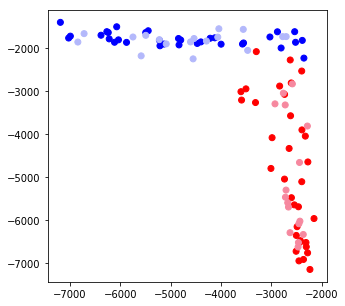

In [56]:
x_train_embed_pca = np.dot(sPCA_comps, x_train.T)

x1_train_pca = x_train_embed_pca[0]
x2_train_pca = x_train_embed_pca[1]

color_train_pca = ['red' if y == 0 else 'blue' for y in y_train]

# TEST
x_test_embed_pca = np.dot(sPCA_comps, x_test.T)

x1_test_pca = x_test_embed_pca[0]
x2_test_pca = x_test_embed_pca[1]

light_blue = '#b3b8fb'
light_red = '#f6889f'

color_test_pca = [light_red if y == 0 else light_blue for y in y_test]

fig = plt.figure(figsize=[5,5])

plt.scatter(x1_train_pca, x2_train_pca, color = color_train_pca)
plt.scatter(x1_test_pca, x2_test_pca, color = color_test_pca) #, alpha = .6)

circ = plt.Circle((-30, 30), radius=8, edgecolor='black', facecolor='None')
ax = plt.gca()

ax.add_patch(circ)

cav_pca = np.dot(sPCA_comps, this_cav.T)
cav_norm = vector_norm(cav_pca)
cav_norm *= 8
#origin = [-30],[30]
#plt.quiver(*origin, cav_norm[0], cav_norm[1], color='black',scale=100)

arrow_start = [-30,30]

my_arrow = plt.arrow(arrow_start[0], arrow_start[1], cav_norm[0], cav_norm[1],width=.4,
                     length_includes_head=True,head_width=2,fc='k', ec=None)
ax.add_patch(my_arrow)


#plt.xlim([-40,40])
#plt.ylim([-5,10])

fig_path = 'figs/jul_9/pca_' + cav_name + '.png'

path = os.path.join(working_dir,fig_path)
#plt.savefig(path,dpi=200)



In [57]:
cav_norm

array([ 0.90483689, -7.94866468])

In [58]:
## new acts

## UMAP

In [32]:
## umap
import umap

In [79]:
#this_umap = umap.UMAP.fit((x_train,2))
this_umap = umap.UMAP(n_neighbors=10, random_state=42).fit(x_train)

x_train_umap = this_umap.transform(x_train)
x1_train = [x[0] for x in x_train_embed_umap]
x2_train = [x[1] for x in x_train_embed_umap]

x_test_umap = this_umap.transform(x_test)
x1_test = [x[0] for x in x_test_umap]
x2_test = [x[1] for x in x_test_umap]

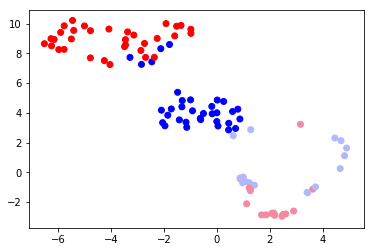

In [80]:
plt.scatter(x1_train, x2_train, color = color_train_pca)
plt.scatter(x1_test, x2_test, color = color_test_pca) #, alpha = .6)

In [ ]:
## TSNE
t = TSNE(n_components=2, perplexity=30).fit(x_train)

x_train_embed = TSNE(n_components=2, perplexity=50).fit_transform(x_train)

x1_train = np.array([a[0] for a  in x_train_embed])
x2_train = np.array([a[1] for a  in x_train_embed])

color_train = ['red' if y == 0 else 'blue' for y in y_train]

x_test_embed = TSNE(n_components=2).fit_transform(x_test)

x1_test = np.array([a[0] for a  in x_test_embed])
x2_test = np.array([a[1] for a  in x_test_embed])

color_test = ['red' if y == 0 else 'blue' for y in y_test]

plt.scatter(x1_train, x2_train, color = color_train)
#plt.scatter(x1_test, x2_test, color = color_test)

#plt.legend(['blue'])
#plt.legend(['red'])

path = os.path.join(working_dir,'figs/tsne_striped_2_random_1_layer_9.png')


In [ ]:
## Load CAV
working_dir = '/home/tyler/Desktop/tcav_on_azure'

path = os.path.join(working_dir,'cavs/striped_sub_2-random500_0-mixed9-linear-0.1.pkl')

with open(path, 'rb') as f:
    data = pickle.load(f)
    
d = dict(data)
arr = d['cavs']

## Decision boundary

In [34]:
X_Train_embedded = x_train_embed
y_predicted = y_train

In [35]:
from sklearn.neighbors import KNeighborsClassifier

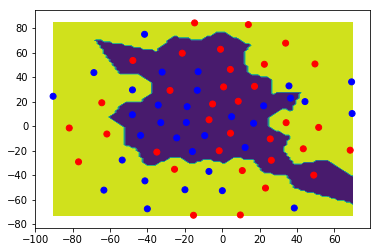

In [122]:
resolution = 100 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, y_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
plt.contourf(xx, yy, voronoiBackground)
plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=color_train)
plt.show()

In [74]:
## TSNE example
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(4, 2)

## Replicate lm

In [ ]:
lm = linear_model.SGDClassifier(alpha=.1)
lm.fit(x_train, y_train)

In [ ]:
lm.predict(x_test)

In [ ]:
y_pred

In [ ]:
#lm.coef_.shape

coef = lm.coef_

In [ ]:
#bound = TSNE(n_components=2).fit_transform(coef)

In [ ]:
coef

## Decision Boundary

In [ ]:
x = np.array([[-1,1],[-1,-1],[1,-1],[1,1]])
y = np.array([0,0,1,1])

In [ ]:
#y

In [ ]:
lm = linear_model.SGDClassifier(alpha=.1)
lm.fit(x, y)

In [ ]:
#x[:, 0].min()

In [ ]:
h = .1  # step size in the mesh
# create a mesh to plot in
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
z = lm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap ='plasma')


x1 = np.array([a[0] for a  in x])
x2 = np.array([a[1] for a  in x])

color = ['red' if y == 0 else 'blue' for y in y]

plt.scatter(x1, x2, color = color)

In [ ]:
z[0][0]